In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

seed = 1
np.random.seed(seed) # ensure same result for testing purpose

In [120]:
#load the dataset
cardiovascular = pd.read_csv('dataset.csv')

# Data Exploration and Visualizing

In [121]:
cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [122]:
print(cardiovascular.head()) # First 5 data
cardiovascular_shape = cardiovascular.shape
row_count = cardiovascular_shape[0]
col_count = cardiovascular_shape[1]
print(f"Shape: {cardiovascular_shape}")
print(f"Total of {row_count} records")
print(f"Total of {col_count} Columns")

   Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2          1  Sometimes      no             2.65            bus   
2         3          1  Sometimes      no             1.89            car   
3         2          1  Sometimes      no             2.00            bus   
4         3          3  Sometimes      no             2.82            bus   

   Exercise        TV  Income Discipline Cardiovascular_risk(y)  
0         3      rar

In [123]:
# Check for null values
cardiovascular.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [124]:
# Seperates to categorial and numberics for visualization purpose
cardiovascular_num = cardiovascular.select_dtypes(exclude="object")
cardiovascular_cat = cardiovascular.select_dtypes(include="object")

# Some data are numeric but can be analyse as categorical for visualization
cardiovascular_numeric_cat = cardiovascular[["Vege_day", "Meals_day", "Exercise"]]

print(cardiovascular_num.info(), end="\n\n")
print(cardiovascular_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2100 non-null   int64  
 1   Height(cm)       2100 non-null   float64
 2   Weight(kg)       2100 non-null   float64
 3   Vege_day         2100 non-null   int64  
 4   Meals_day        2100 non-null   int64  
 5   Water_intake(L)  2100 non-null   float64
 6   Exercise         2100 non-null   int64  
 7   Income           2100 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 131.4 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2100 non-null   object
 1   Family_history          2100 non-null   object
 2   Alcohol                 2100 non-null   object
 3   Junk

In [125]:
cardiovascular_num.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


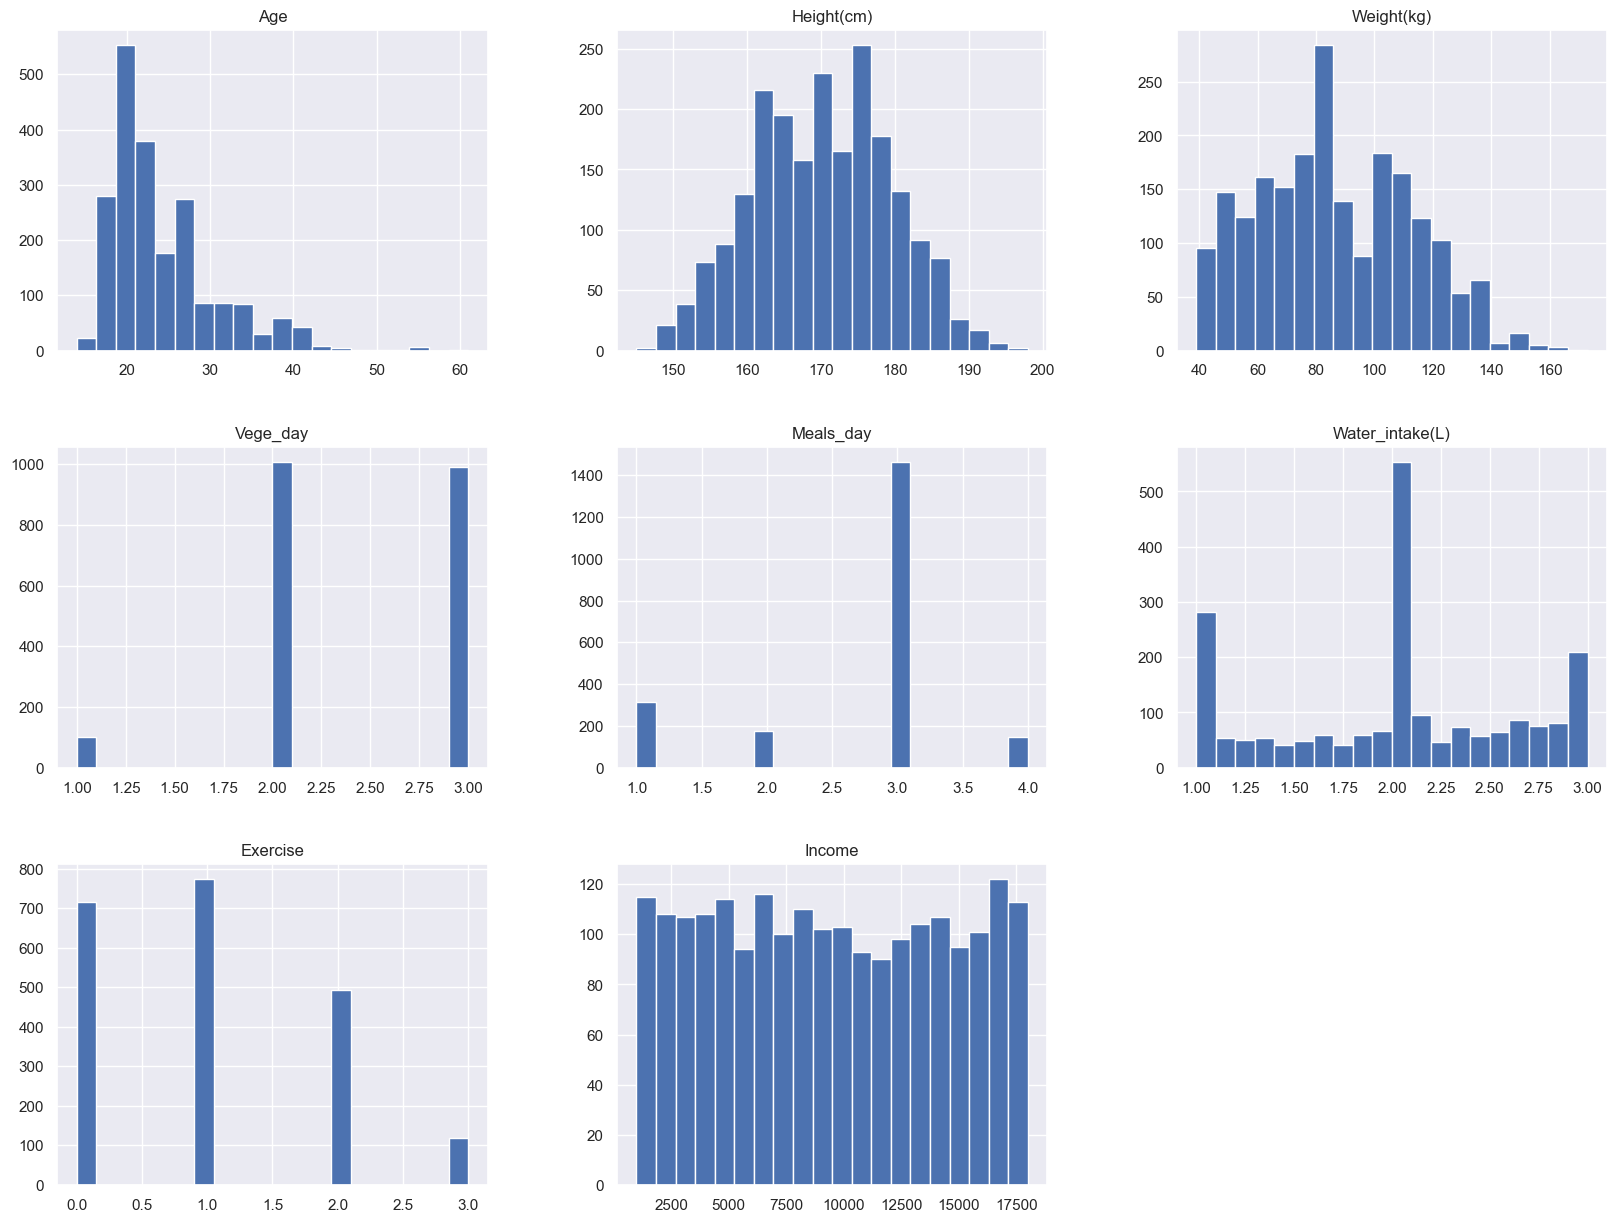

In [126]:
# Plot histogram for numerical columns
cardiovascular_num.hist(bins=20, figsize=(20,15))
plt.show()

                     Skew
Age              1.527517
Height(cm)      -0.008299
Weight(kg)       0.255598
Vege_day        -0.431385
Meals_day       -1.067331
Water_intake(L) -0.103556
Exercise         0.458999
Income           0.031238
Age


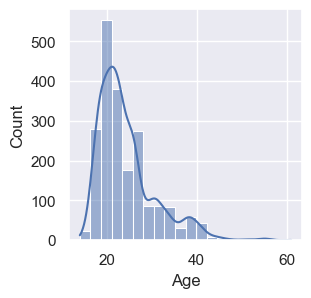

Height(cm)


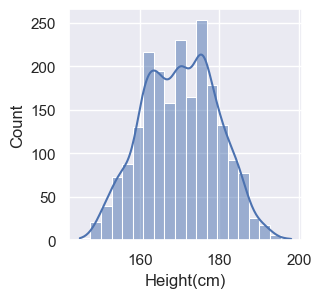

Weight(kg)


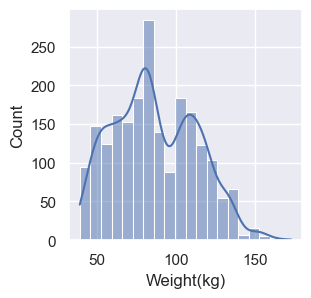

Vege_day


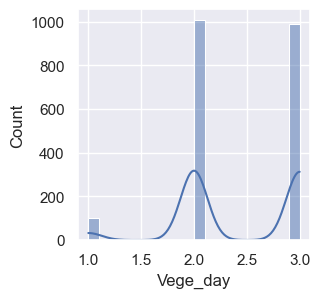

Meals_day


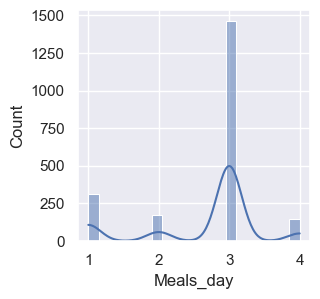

Water_intake(L)


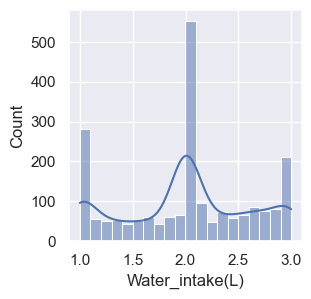

Exercise


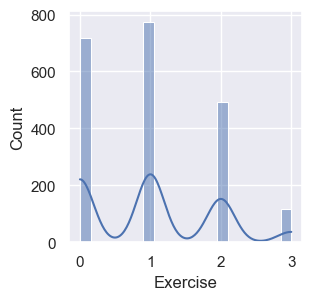

Income


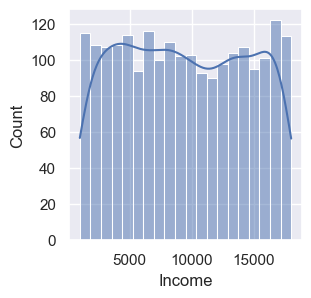

In [127]:
# Check the skewness of the data
skew = cardiovascular_num.skew()
skewness = pd.DataFrame(data=skew, columns=["Skew"])
print(skewness)
sns.set(rc = {"figure.figsize": (3, 3)})

for col in cardiovascular_num:
    print(col)
    sns.histplot(cardiovascular[col], bins=20, kde=True)
    plt.show()

In [128]:
# Check the categorical data
cardiovascular_cat_visualise = cardiovascular_cat.columns.union(cardiovascular_numeric_cat.columns)
for col in (cardiovascular_cat_visualise):
    print(cardiovascular[col].value_counts().sort_index())
    print()

Alcohol
high         1
low       1394
medium      70
none       635
Name: count, dtype: int64

Cardiovascular_risk(y)
high      967
low       557
medium    576
Name: count, dtype: int64

Discipline
no     2004
yes      96
Name: count, dtype: int64

Exercise
0    716
1    773
2    493
3    118
Name: count, dtype: int64

Family_history
no      385
yes    1715
Name: count, dtype: int64

Gender
Female    1040
Male      1060
Name: count, dtype: int64

Junk_food
no      245
yes    1855
Name: count, dtype: int64

Meals_day
1     315
2     175
3    1462
4     148
Name: count, dtype: int64

Smoking
no     2056
yes      44
Name: count, dtype: int64

Snack
Always          53
Frequently     242
No              51
Sometimes     1754
Name: count, dtype: int64

TV
moderate    910
often       243
rare        947
Name: count, dtype: int64

Transportation
bicycle          6
bus           1573
car            454
motorcycle      11
walk            56
Name: count, dtype: int64

Vege_day
1     102
2    1007

Age


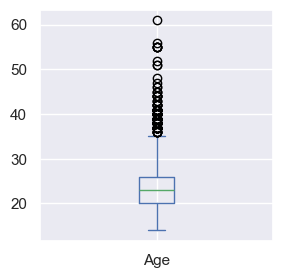

Height(cm)


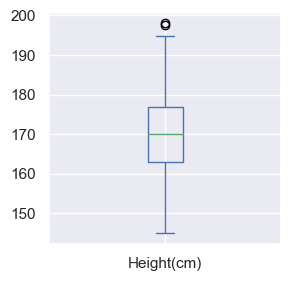

Income


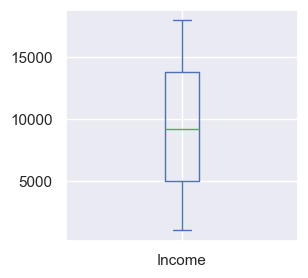

Water_intake(L)


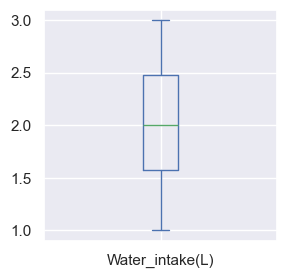

Weight(kg)


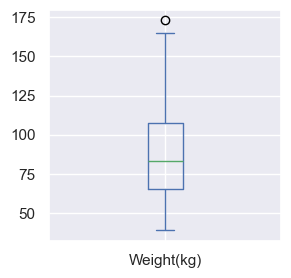

In [129]:
for col in cardiovascular_num.columns.difference(cardiovascular_numeric_cat.columns):
    print(col)
    cardiovascular[col].plot.box(figsize = (3, 3))
    plt.show()

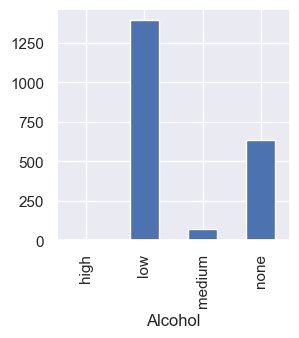

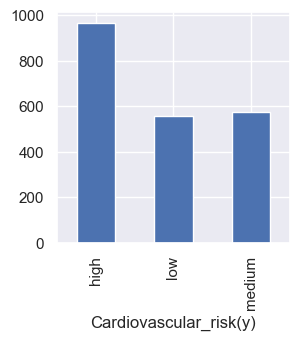

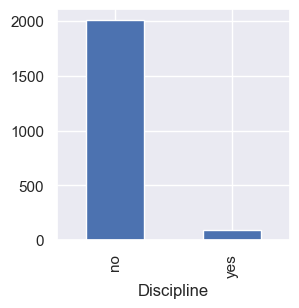

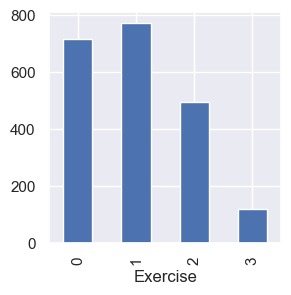

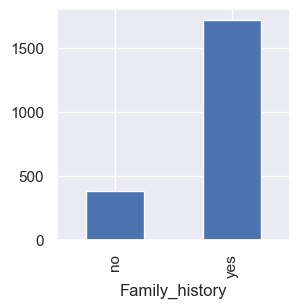

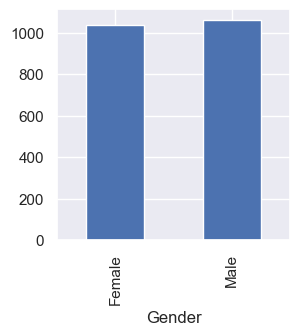

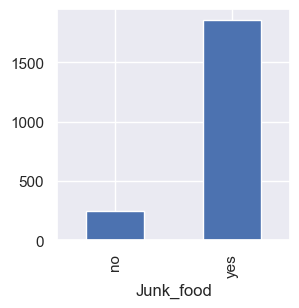

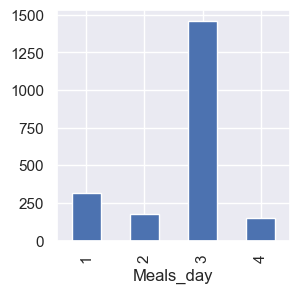

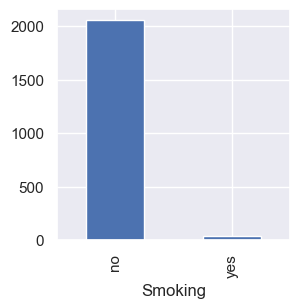

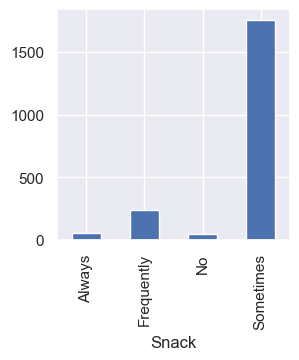

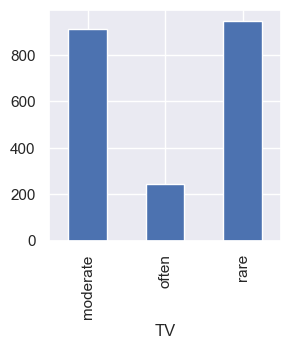

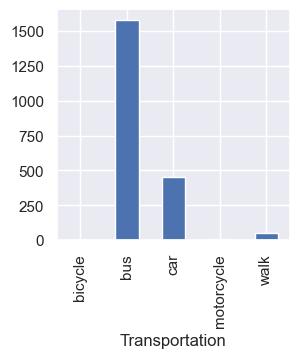

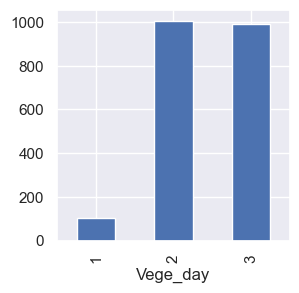

In [130]:
for col in cardiovascular_cat_visualise:
    cardiovascular[col].value_counts().sort_index().plot(kind="bar")
    plt.show()

# Data Preprocessing

In [131]:
# Check for null values
cardiovascular.isnull().sum()

Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64

<b>Since there is no null value, we just perform to seperate the datasets</b>

In [132]:
# Seperate X and y
X = cardiovascular.drop("Cardiovascular_risk(y)", axis = 1)
y = cardiovascular["Cardiovascular_risk(y)"]

In [133]:
# Print shape of X and y
print ('Dataset:', cardiovascular.shape)
print ('X: shape=', X.shape)
print ('y: shape=', y.shape)

Dataset: (2100, 18)
X: shape= (2100, 17)
y: shape= (2100,)


In [134]:
# Split numerical and categorical sets
X_num = X.select_dtypes(exclude="object")
X_cat = X.select_dtypes("object")

print('X_num shape:', X_num.shape)
print('X_cat shape:', X_cat.shape)

X_num shape: (2100, 8)
X_cat shape: (2100, 9)


In [135]:
# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_num)
X_num = scaler.transform(X_num)

In [136]:
# Make sure it is standardized
print('>>> Mean of all columns:\n', X_num.mean(axis=0))
print('\n>>> Std of all columns:\n', X_num.std(axis=0))

>>> Mean of all columns:
 [-2.57148800e-16 -5.48978852e-16  1.15040252e-16 -5.92118946e-17
 -1.42108547e-16 -2.28388736e-16  1.19269674e-16 -3.97565578e-17]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1.]


In [137]:
#Encoding the categorical feature into its one-hot representation
from sklearn.preprocessing import OneHotEncoder

# Using OneHotEncoder to encode multiple categorical features
encoder = OneHotEncoder(sparse_output=False)
X_cat = encoder.fit_transform(X_cat)

In [138]:
print('Shape of X_cat:', X_cat.shape, '\n')
print(X_cat, '\n')

Shape of X_cat: (2100, 26) 

[[1. 0. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]] 



In [139]:
# Stack the categorical data back to the set
X_coded = np.hstack([X_num, X_cat])

print('X_coded shape:', X_coded.shape)
print('y shape:', y.shape)

X_coded shape: (2100, 34)
y shape: (2100,)


In [140]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.2, random_state=seed)

In [141]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1680, 34)
(1680,)
(420, 34)
(420,)


# Model Training

<b>Before training the model, we first define some visualization to evaluate the model</b>

In [142]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
class_labels = ['low', 'medium', 'high']

def showConfusionMatirx(y_test, y_pred, class_labels):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Classification report:")
    print(metrics.classification_report(y_test, y_pred, target_names=class_labels))

    # Generate the normalized confusion matrix
    cm_normalized = confusion_matrix(y_test, y_pred, normalize='all', labels=class_labels)
    cm_display = ConfusionMatrixDisplay(cm_normalized, display_labels=class_labels)

    cm_display.plot(cmap='Blues')
    plt.grid(False)
    # Change size of figure
    plt.figure(figsize=(8, 8))
    plt.title("Normalized Confusion_matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            # Change the text to the confusion matrix value
            text = cm_display.text_[i, j].get_text()
            cm_display.text_[i, j].set_text(f"{text}\n({cm[i, j]})")

    plt.show()

def showPrecisionRecall(model, X_test, y_test, classes):

    y_pred_prob = model.predict_proba(X_test)
    y_true_binary = label_binarize(y_test, classes=classes)
    n_classes = len(classes)

    # precision recall curve
    precision = dict()
    recall = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_binary[:, i], y_pred_prob[:, i])
        plt.plot(recall[i], precision[i], label=classes[i], lw=2)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.title("Precision vs. Recall curve")
    plt.show()

def showRocCurve(model, X_test, y_test, classes):
    y_pred_prob = model.predict_proba(X_test)
    y_true_binary = label_binarize(y_test, classes=classes)
    n_classes = len(classes)
    plt.figure(figsize=(8, 8))

    # roc curve
    fpr = dict() # false positive rate
    tpr = dict() # true positive rate

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_prob[:, i])
        plt.plot(fpr[i], tpr[i], label=classes[i], lw=2)

    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()

## Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

forest_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=seed))

# Train the model
forest_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=1))

In [144]:
# Predict on the training set
from sklearn.metrics import accuracy_score

y_pred = forest_classifier.predict(X_train)

train_acc = accuracy_score(y_train, y_pred)

print(f"Training accuracy: {train_acc:.4f}")
print()
print(y_train.value_counts())

Training accuracy: 1.0000

Cardiovascular_risk(y)
high      775
medium    469
low       436
Name: count, dtype: int64


In [145]:
print(f"The model can achieve at most {775/1680:.4f} accuracy if all predicted values are 'medium'.")

The model can achieve at most 0.4613 accuracy if all predicted values are 'medium'.


Cross-validation scores: [0.97321429 0.95238095 0.94047619 0.9672619  0.95833333]
Classification report:
              precision    recall  f1-score   support

         low       0.99      0.99      0.99       775
      medium       0.93      0.94      0.94       436
        high       0.93      0.93      0.93       469

    accuracy                           0.96      1680
   macro avg       0.95      0.95      0.95      1680
weighted avg       0.96      0.96      0.96      1680



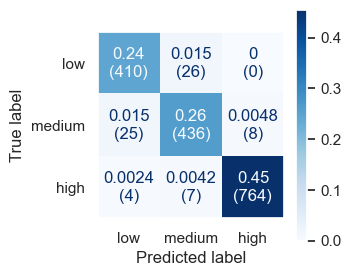

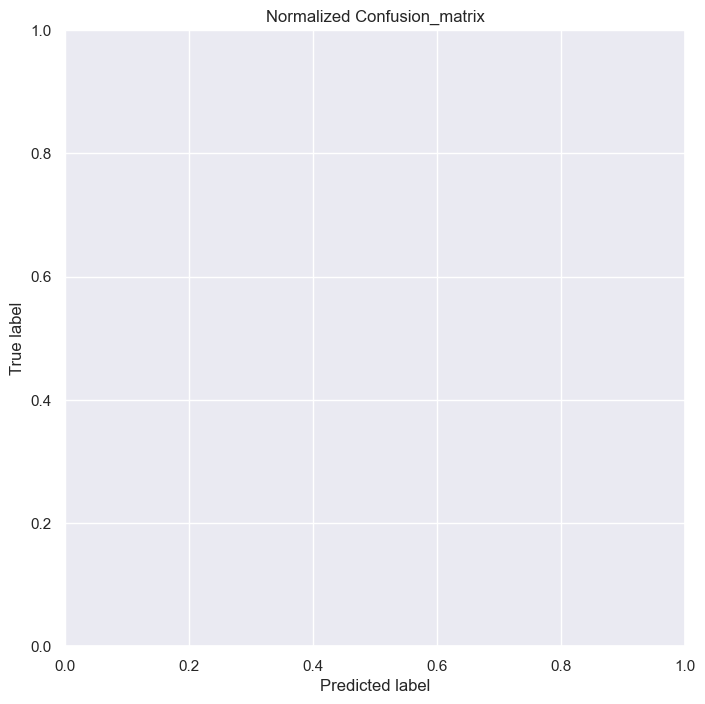

In [146]:
# Do cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
cv_count = 5

y_pred_cv = cross_val_predict (forest_classifier, X_train, y_train, cv=cv_count)
y_pred_cv_score = cross_val_score(forest_classifier, X_train, y_train, cv=cv_count, scoring="accuracy")
print(f"Cross-validation scores: {y_pred_cv_score}")
cm = confusion_matrix(y_train, y_pred_cv)
showConfusionMatirx(y_train, y_pred_cv, class_labels)

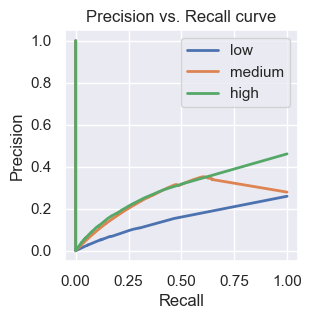

In [147]:
showPrecisionRecall(forest_classifier, X_train, y_train, class_labels)

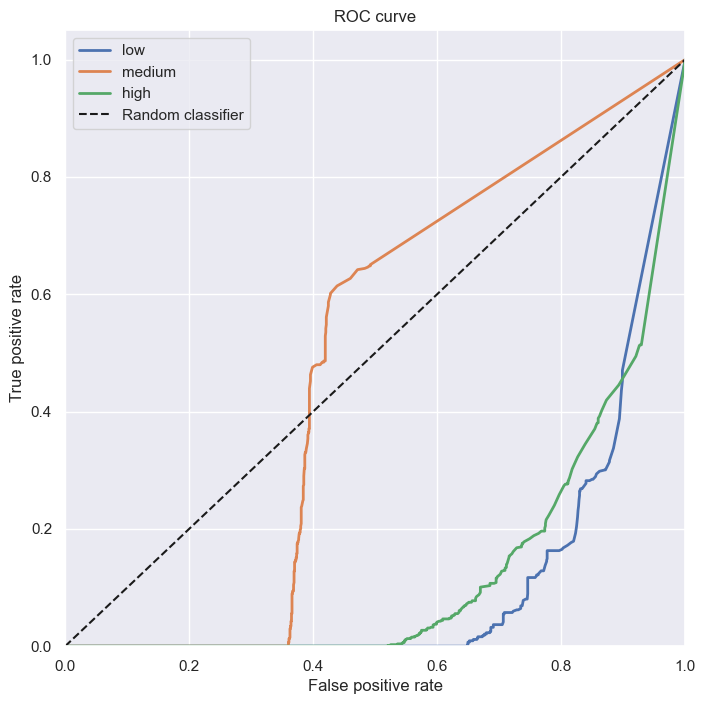

In [148]:
showRocCurve(forest_classifier, X_train, y_train, class_labels)

## SGD

In [149]:
from sklearn.linear_model import SGDClassifier

# create model
sgd_classifier = OneVsRestClassifier(SGDClassifier(loss="log_loss", random_state = seed, tol=None))

# training
sgd_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss', random_state=1,
                                            tol=None))

In [150]:
train_acc = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {train_acc:.6f}")

Training accuracy: 1.000000


Cross-validation scores: [0.97321429 0.96428571 0.9672619  0.9702381  0.97321429]
Classification report:
              precision    recall  f1-score   support

         low       0.98      0.99      0.99       775
      medium       0.95      0.98      0.97       436
        high       0.97      0.92      0.94       469

    accuracy                           0.97      1680
   macro avg       0.97      0.97      0.97      1680
weighted avg       0.97      0.97      0.97      1680



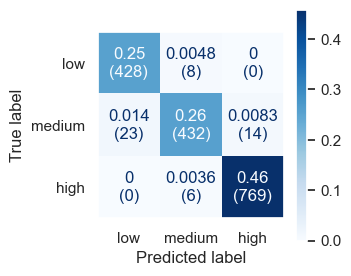

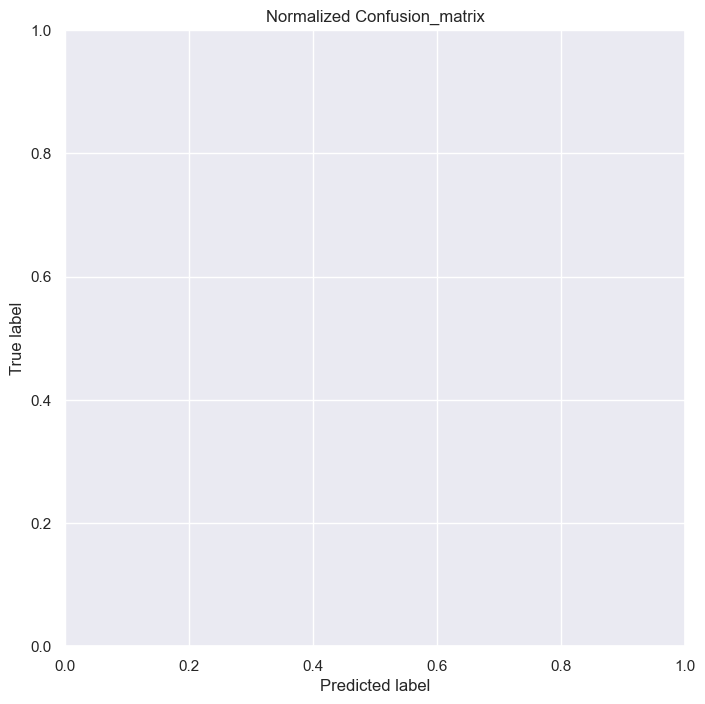

In [151]:
# Cross validation
cv_score = cross_val_score(sgd_classifier, X_train, y_train, cv=cv_count, scoring="accuracy")
cv_pred = cross_val_predict (sgd_classifier, X_train, y_train, cv=cv_count)
print(f"Cross-validation scores: {cv_score}")
cm = confusion_matrix(y_train, cv_pred)
showConfusionMatirx(y_train, cv_pred, class_labels)

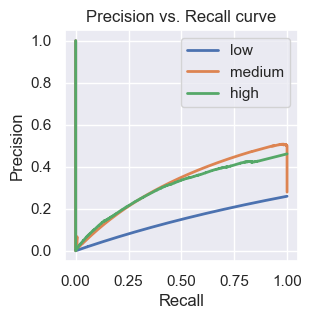

In [152]:
showPrecisionRecall(sgd_classifier, X_train, y_train, class_labels)

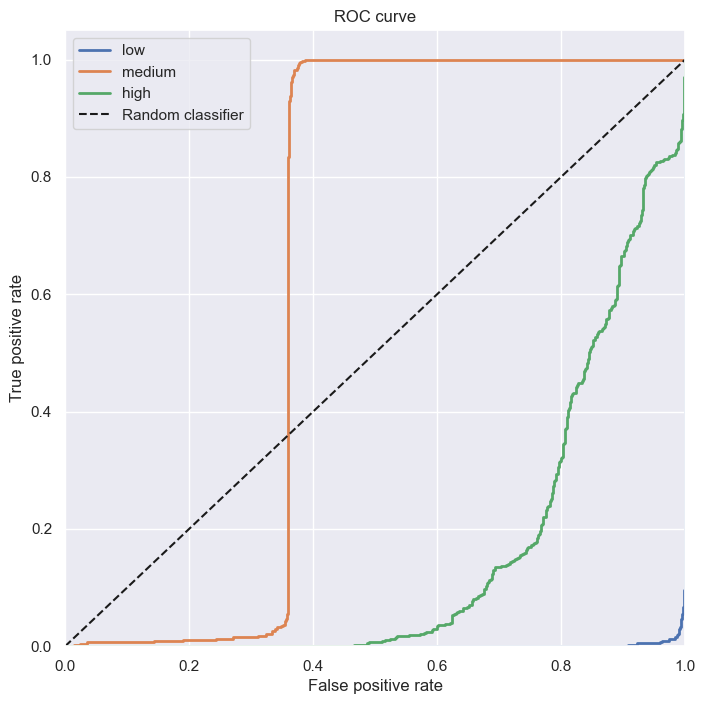

In [153]:
showRocCurve(sgd_classifier, X_train, y_train, class_labels)

## Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logistic_regression_classification = OneVsRestClassifier(LogisticRegression(random_state=seed))
logistic_regression_classification.fit(X_train, y_train)

y_pred = logistic_regression_classification.predict(X_train)

In [155]:
score_acc = accuracy_score(y_pred, y_train)
print(f"Accuracy score: {score_acc:.6f}")

Accuracy score: 0.959524


Cross-validation scores: [0.95238095 0.94047619 0.94345238 0.95535714 0.94940476]
Classification report:
              precision    recall  f1-score   support

         low       0.97      0.99      0.98       775
      medium       0.92      0.95      0.94       436
        high       0.94      0.87      0.90       469

    accuracy                           0.95      1680
   macro avg       0.94      0.94      0.94      1680
weighted avg       0.95      0.95      0.95      1680



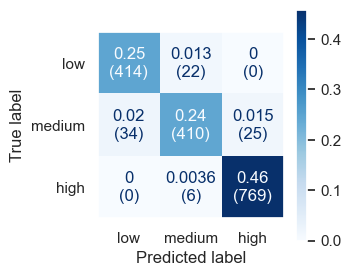

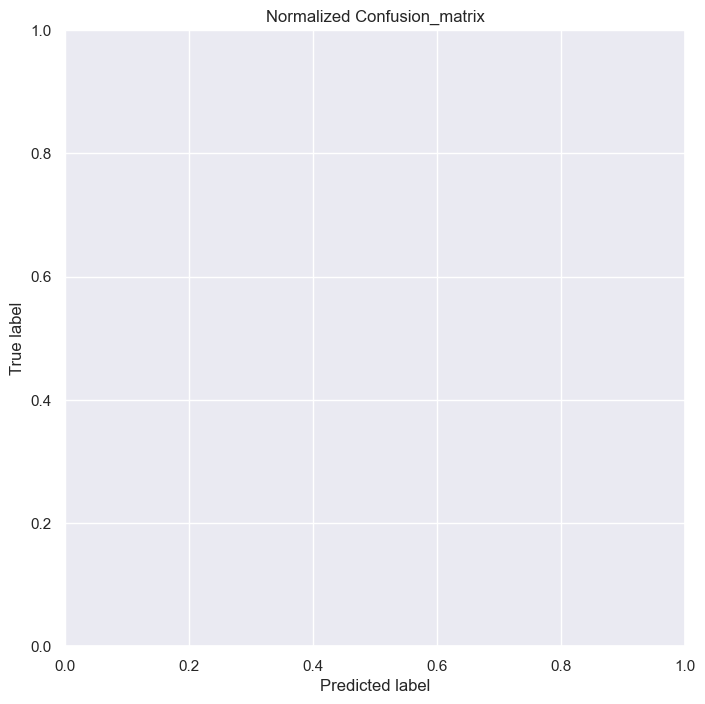

In [156]:
# Cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score
cv_score = cross_val_score(logistic_regression_classification, X_train, y_train, cv=cv_count, scoring="accuracy")
cv_pred = cross_val_predict (logistic_regression_classification, X_train, y_train, cv=cv_count)
print(f"Cross-validation scores: {cv_score}")
showConfusionMatirx(y_train, cv_pred, class_labels)

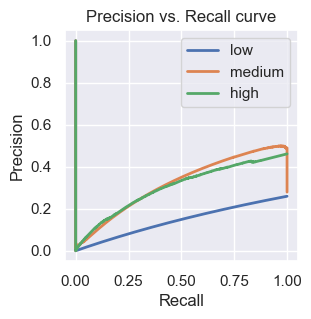

In [157]:
# Precision recall curve
showPrecisionRecall(logistic_regression_classification, X_train, y_train, class_labels)

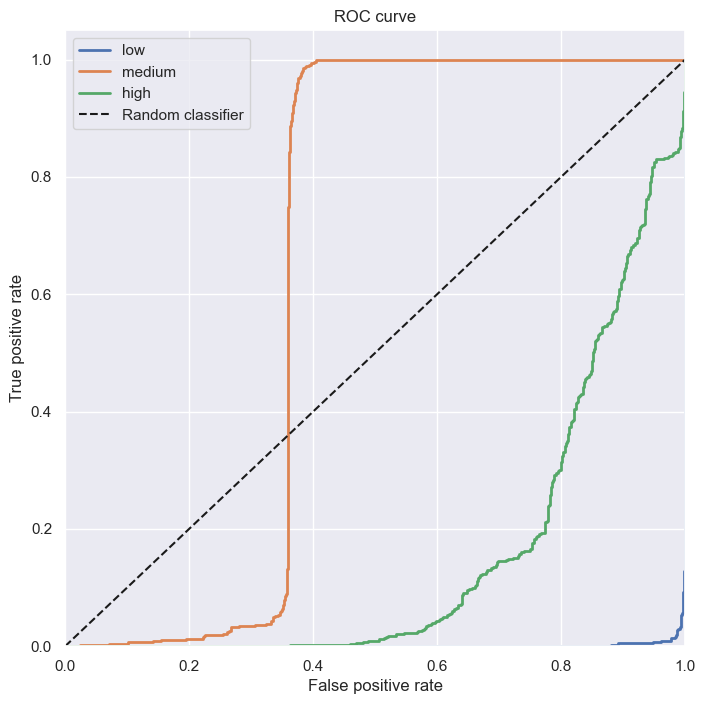

In [158]:
# Show ROC curve
showRocCurve(logistic_regression_classification, X_train, y_train, class_labels)

# Tuning and Testing

In [85]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [10, 20, None],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Define the parameter grid for SGDClassifier
sgd_param_grid = {
    'estimator__loss': ['hinge', 'log_loss', 'squared_hinge'],  # Valid loss functions
    'estimator__eta0': [0.001, 0.01, 0.1],  # Learning rate
    'estimator__max_iter': [1000, 2000],  # Number of iterations
}

# Hyperparameter grid for the underlying LogisticRegression
logreg_param_grid = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'estimator__penalty': ['l2', 'none'],        # Regularization term
    'estimator__solver': ['liblinear', 'saga']   # Optimization algorithm
}

In [58]:
# RandomForest
rf_model = RandomForestClassifier(random_state=seed)
rf_grid = GridSearchCV(estimator=rf_model, param_grid=random_forest_param_grid, cv=cv_count)

In [86]:
# Create the SGDClassifier and GridSearchCV instances
sgd_classifier = SGDClassifier()
sgd_grid = GridSearchCV(estimator=sgd_classifier, param_grid=sgd_param_grid, cv=5, scoring='accuracy')

In [78]:
# LogisticRegression
logreg_model = OneVsRestClassifier(LogisticRegression(random_state=seed))
logreg_grid = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid, cv=cv_count)

In [60]:
# Fit RandomForest
rf_grid.fit(X_train, y_train)
print(f"Best parameters for RandomForest: {rf_grid.best_params_}")

Best parameters for RandomForest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [83]:
# Fit SGDClassifier
sgd_grid.fit(X_train, y_train)
print(f"Best parameters for SGDClassifier: {sgd_grid.best_params_}")

Best parameters for SGDClassifier: {'estimator__eta0': 0.001, 'estimator__loss': 'log_loss', 'estimator__max_iter': 2000}


In [87]:
# Fit LogisticRegression
logreg_grid.fit(X_train, y_train)
print(f"Best parameters for LogisticRegression: {logreg_grid.best_params_}")

C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yee05\

Best parameters for LogisticRegression: {'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\yee05\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yee05\AppData\Roaming\Python\Python312\site-packa

In [84]:
from sklearn.metrics import classification_report
# Predict and evaluate for RandomForest
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
print("Classification Report for RandomForest:\n", classification_report(y_test, y_pred_rf))

# Predict and evaluate for SGDClassifier
y_pred_sgd = sgd_grid.best_estimator_.predict(X_test)
print("Classification Report for SGDClassifier:\n", classification_report(y_test, y_pred_sgd))

# Predict and evaluate for LogisticRegression
y_pred_logreg = logreg_grid.best_estimator_.predict(X_test)
print("Classification Report for LogisticRegression:\n", classification_report(y_test, y_pred_logreg))

Classification Report for RandomForest:
               precision    recall  f1-score   support

        high       0.99      0.98      0.99       192
         low       0.95      0.96      0.95       121
      medium       0.92      0.93      0.93       107

    accuracy                           0.96       420
   macro avg       0.95      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420

Classification Report for SGDClassifier:
               precision    recall  f1-score   support

        high       0.98      1.00      0.99       192
         low       0.97      0.98      0.97       121
      medium       0.97      0.93      0.95       107

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420

Classification Report for LogisticRegression:
               precision    recall  f1-score   support

        high       0.98      1.00      0.99       192